# **Experimenting with Machine Learning**
**TL;DR** : skip the boring part by accessing the google colaboratory file, run all, and go to the bottom of the page for the fun part
[Google Colaboratory File]( https://colab.research.google.com/drive/1q5FXlyHFHIYLyJcux4klLoTa6nzbM740?authuser=1#scrollTo=hneVyFwcAdiO)
---


In this notebook we will experiment with machine learning, specifically we want to know how machine learning algorithms generalize a function yhat from a given set of data, given that we know exactly the function y itself. 

Let us begin by declaring the problem. We will try a classification problem where we want to classify a point (a, b) is within the positive boundary or negative bounday of the function. Consider the boundary a = b which will look like this :

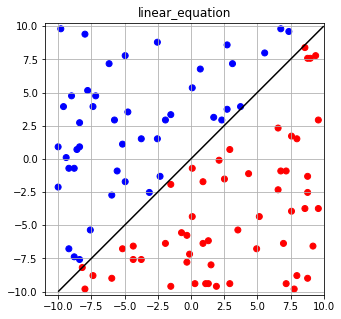

In [393]:
import numpy as np  
import matplotlib.pyplot as plt  

def linear_equation(X,Y):
  '''
  declare the equation we want to evaluate
  '''
  return Y - X

def graph(equation, i=111, window=(-3.0,3.0), xdot=None, ydot=None, name=None):
  '''
  graph the equation and random sample we want to evaluate
  '''
#   plt.figure(figsize=figsize)
  plt.subplot(i) # Create a new figure window
  xlist = np.linspace(window[0], window[1], 100) # Create 1-D arrays for x,y dimensions
  ylist = np.linspace(window[0], window[1], 100) 
  X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
  
  F = equation(X,Y) # call the equation

  #sample some points from the linspace
  if(xdot is None):
    xdot = np.random.choice(np.array(xlist),100)
  if(ydot is None):
    ydot = np.random.choice(np.array(ylist),100)

  #map the dots with red and blue
  dots_label = (equation(xdot, ydot) > 0)
  mapper = {True : 'blue', False: 'red'}
  color = np.vectorize(mapper.get)(dots_label)

  #graph the graphics
  if(name is None):
    name = equation.__name__
  plt.title(name)
  plt.scatter(xdot, ydot, color=color)
  plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
  plt.grid(); plt.axis('equal')
  plt.plot()
#   plt.show()
  
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
graph(linear_equation, axes, window=(-10.0,10.0))


As we can see in the figure above, we can see that the dots above the line are marked in red, and the the dots below the line are marked with blue. (This color mark may be not consistent as they are determine by the way we define the function, but alas, these color still functions as a discriminator of the point relative to the line.) How about other hyperbola for example that's far more exciting than a simple line, one may ask? 

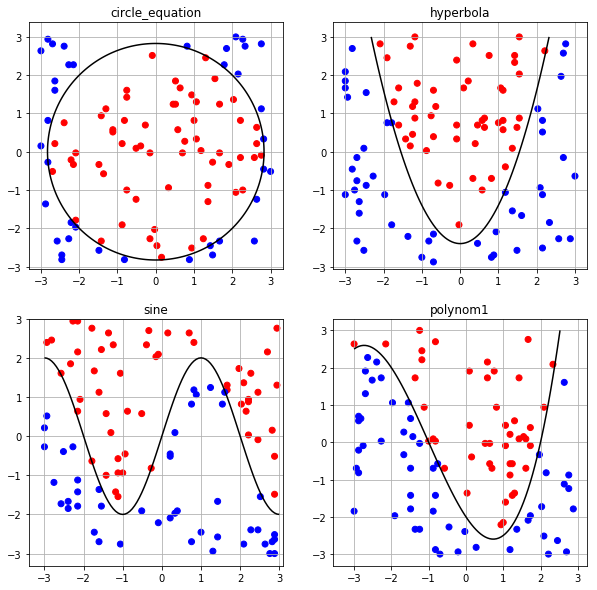

In [372]:
import math
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
def circle_equation(x,y):
  return np.power(x,2) + np.power(y,2) - 8

def hyperbola(x,y):
  return np.power(x,2) -y - 2.4

def sine(x,y):
  return 2 * np.sin(x * math.pi /2) - y

def polynom1(x,y):
#   x3/4 + 3x2/4 − 3x/2 − 2
  return np.power(x,3)/4 + 3 * np.power(x,2)/4 - 3 * x / 2 - 2 - y

graph(circle_equation, axes[0][0])
graph(hyperbola, axes[0][1])
graph(sine, axes[1][0])
graph(polynom1, axes[1][1])

now, something you might be hearing a lot from other people is that machine learning are functions approximators. Meaning, given a set of points and their labels (i.e., red or blue) they can generalize a function yhat that approximates the function y. Usually in statistics, we don't know for sure, what the function y exactly, but what if we know? Perhaps we can observe to what extend machine learning are able to approximate a function. Let's do this!

But first we need to tweak our graph functions. So, the function can take the dots as an input.

In [0]:
def graph2(equation, name=equation.__name__, i=111, window=(3.0,3.0), xlist = None, ylist = None, xdot = None, ydot = None, color = None):
  '''
  graph the equation and random sample we want to evaluate
  '''
#   plt.figure(figsize=figsize)
  plt.subplot(i) # Create a new figure window
  if(xlist is None):
    xlist = np.linspace(-window[0], window[1], 100) # Create 1-D arrays for x,y dimensions
  if(ylist is None):
    ylist = np.linspace(-window[0], window[1], 100) 
  X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
  
  F = equation(X,Y) # call the equation

  #sample some points from the linspace
  if (xdot is None):
    xdot = np.random.choice(np.array(xlist),100)
  if(ydot is None):
    ydot = np.random.choice(np.array(ylist),100)

  #map the dots with red and blue
  if(color is None):
    dots_label = (equation(xdot, ydot) > 0)
    mapper = {True : 'blue', False: 'red'}
    color = np.vectorize(mapper.get)(dots_label)

  #graph the graphics
  plt.title(name)
  plt.scatter(xdot, ydot, color=color)
  plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
  plt.grid(); plt.axis('equal')
  plt.plot()
#   plt.show()

In [0]:
window = (-3.0,3.0)
xlist = np.linspace(*window, 100)
ylist = np.linspace(*window, 100)

daset_size = 500

xdot = np.random.choice(xlist, daset_size)
ydot = np.random.choice(ylist, daset_size)

label = linear_equation(xdot, ydot) > 0 

In [375]:
import pandas as pd

df = pd.DataFrame(np.array([xdot, ydot, label]).T, columns=['x','y','lab'])
df.head()

,x,y,lab
0,-1.545455,-0.696970,1.0
1,1.666667,-2.878788,0.0
2,-1.787879,2.575758,1.0
3,-1.060606,2.515152,1.0
4,-0.515152,-2.090909,0.0


In [0]:
feature = df[['x','y']]
# label = df.lab

from sklearn.model_selection import train_test_split

f_tr, f_te, la_tr, la_te = train_test_split(feature, label, test_size=0.3, random_state=1213)

In [0]:
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP
model_and_names = [
    (LR(solver='lbfgs'), 'LR'),
    (XGB(), 'XGB'),
    (KNN(), 'KNN'),
    (RF(n_estimators=10), 'RF'),
    (SVC(gamma='auto'), 'SVM')
#     (MLP(), 'MLP')
]

In [378]:
test_result = {}

from sklearn.metrics import accuracy_score

for model,name in model_and_names :
  model.fit(f_tr, la_tr)
  la_hat = model.predict(f_te)
  test_result[name] = la_hat
  print(name, end=' ')
  print('%.2f'% accuracy_score(la_te, la_hat))

LR 1.00
XGB 0.93
KNN 0.97
RF 0.97
SVM 0.99


fantastic right? Let's see in graphs shall we?

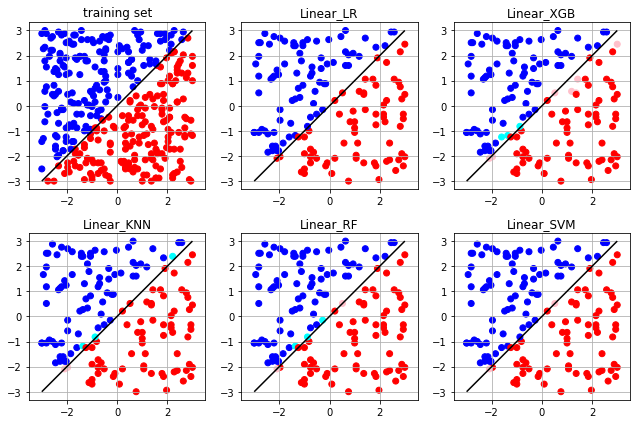

In [379]:
fg, ax = plt.subplots(nrows=2, ncols =3, figsize = (9,6))

ax = ax.flatten()

graph(linear_equation, ax[0], xdot=f_tr.x, ydot=f_tr.y, name='training set')

for ind, (_, name) in enumerate(model_and_names) :
  la_hat = test_result[name]
  tp = la_te & la_hat # true positive
  tn = ~la_te & ~la_hat # true negative
  fp = ~la_te & la_hat # false positive
  fn = la_te & ~la_hat # false negative
  
  alls = pd.DataFrame(np.array([la_te, la_hat]).T, columns = ['tr','pred'])
  alls['comb'] = alls.tr.astype(str) + '_' + alls.pred.astype(str)
  mapper_t = {
      'True_True' : 'tp',
      'False_False' : 'tn',
      'False_True' : 'fp',
      'True_False' : 'fn',   
  }
  alls['comb'] = alls.comb.map(mapper_t)
  alls['color'] = alls.comb.map({'tp': 'blue', 'tn': 'red', 'fp' : 'pink', 'fn' : 'cyan'})
  
  graph2(linear_equation, i=ax[ind+1], xlist=xlist, ylist=ylist, xdot=f_te.x, ydot=f_te.y, color=list(alls.color),
        name = 'Linear_%s' % name)
  
plt.tight_layout()

fantastic...? let's try with other formula shall we? Le'ts create one giant function so we can input just the desired function.



In [0]:
def train(equation, window=(-3.0, 3.0), daset_size=500, test_size=0.9):
  xlist = np.linspace(*window, 100)
  ylist = np.linspace(*window, 100)

  xdot = np.random.choice(xlist, daset_size)
  ydot = np.random.choice(ylist, daset_size)

  label = equation(xdot, ydot) > 0
  
  df = pd.DataFrame(np.array([xdot, ydot, label]).T, columns=['x','y','lab'])
  df.head()
  
  feature = df[['x','y']]
  f_tr, f_te, la_tr, la_te = train_test_split(feature, label, test_size=test_size, random_state=1213)
  
  test_result = {}
  
  for model,name in model_and_names :
    model.fit(f_tr, la_tr)
    la_hat = model.predict(f_te)
    test_result[name] = la_hat
    print(name, end=' ')
    print('%.2f'% accuracy_score(la_te, la_hat))
    
  fg, ax = plt.subplots(nrows=2, ncols =3, figsize = (9,6))

  ax = ax.flatten()

  graph(equation, ax[0], xdot=f_tr.x, ydot=f_tr.y, name='training set', window=window)

  for ind, (_, name) in enumerate(model_and_names) :
    la_hat = test_result[name]
    tp = la_te & la_hat # true positive
    tn = ~la_te & ~la_hat # true negative
    fp = ~la_te & la_hat # false positive
    fn = la_te & ~la_hat # false negative

    alls = pd.DataFrame(np.array([la_te, la_hat]).T, columns = ['tr','pred'])
    alls['comb'] = alls.tr.astype(str) + '_' + alls.pred.astype(str)
    mapper_t = {
        'True_True' : 'tp',
        'False_False' : 'tn',
        'False_True' : 'fp',
        'True_False' : 'fn',   
    }
    alls['comb'] = alls.comb.map(mapper_t)
    alls['color'] = alls.comb.map({'tp': 'blue', 'tn': 'red', 'fp' : 'pink', 'fn' : 'cyan'})

    graph2(equation, i=ax[ind+1], xlist=xlist, ylist=ylist, xdot=f_te.x, ydot=f_te.y, color=list(alls.color),
          name = '%s_%s' % (equation.__name__, name))

  plt.tight_layout()

LR 0.79
XGB 0.92
KNN 0.92
RF 0.93
SVM 0.94


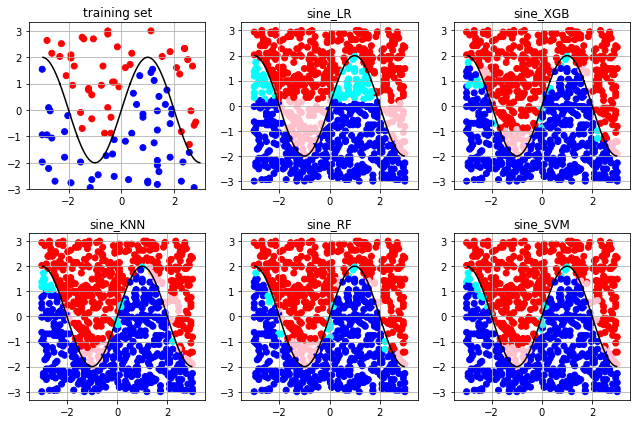

In [381]:
train(sine, daset_size=1000)

now, in this graph, I just tried to toy with the parameters. I decrease the number of training size, because I wanted to the graph to be dense. You can see the decision boundary by following the line that separates blue+pink region with red+cyan region.


---

Legend:
*   Red : True Negative
*   Pink : False Positive
*   Blue : True Positive
*  Cyan : False Negative



LR 0.71
XGB 0.93
KNN 0.95
RF 0.93
SVM 0.96


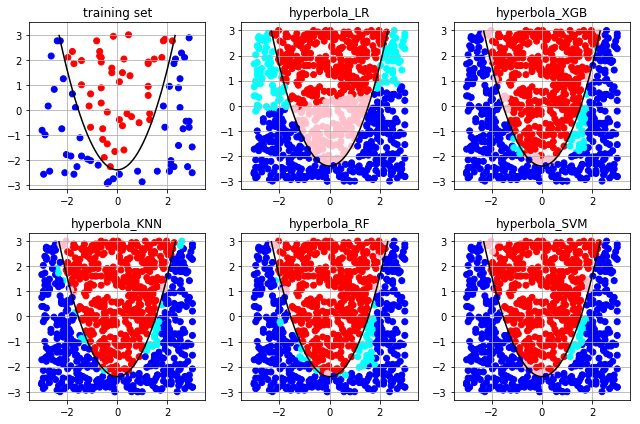

In [382]:
train(hyperbola, daset_size=1000)

LR 0.54
XGB 0.90
KNN 0.88
RF 0.91
SVM 0.90


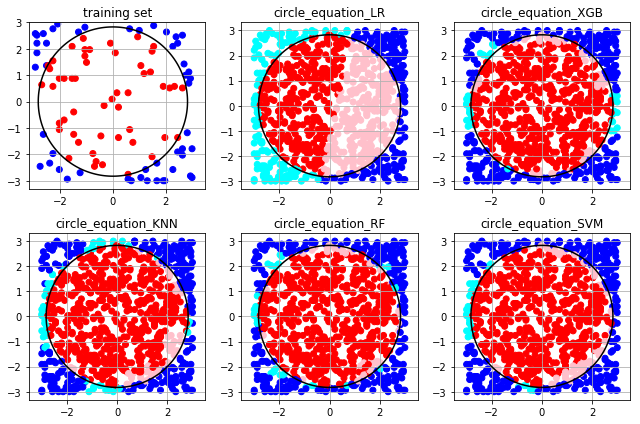

In [383]:
train(circle_equation, daset_size=1000)

LR 0.75
XGB 0.90
KNN 0.92
RF 0.91
SVM 0.92


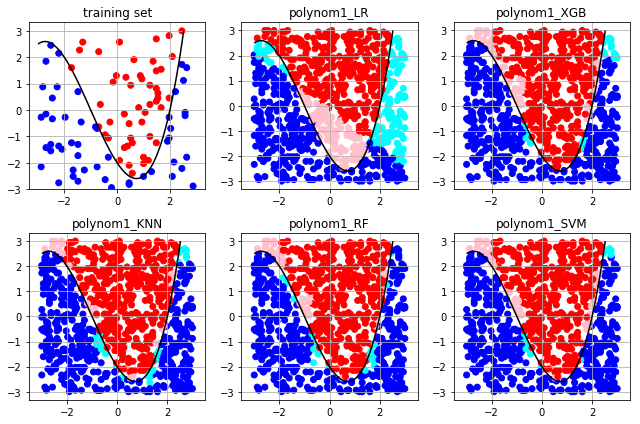

In [384]:
train(polynom1, daset_size=1000)

# **The Fun Part!**

wanted to toy with this? Go on!
access the google colaboratory notebook here if you want to :
https://colab.research.google.com/drive/1q5FXlyHFHIYLyJcux4klLoTa6nzbM740?authuser=1#scrollTo=hneVyFwcAdiO 

In [0]:
def custom(x,y):
  line1 = "" #@param {type:"raw"}
  line2 = "" #@param {type:"raw"}  
  ret = 3 * np.power(y,2) - np.power(x,4) #@param {type:"raw"}
  return ret
#@markdown Write your own equation here! (p.s. look at the examples, compile error's your fault :v). And then, set the equ variable to 'custom'


LR 0.53
XGB 0.88
KNN 0.91
RF 0.87
SVM 0.92


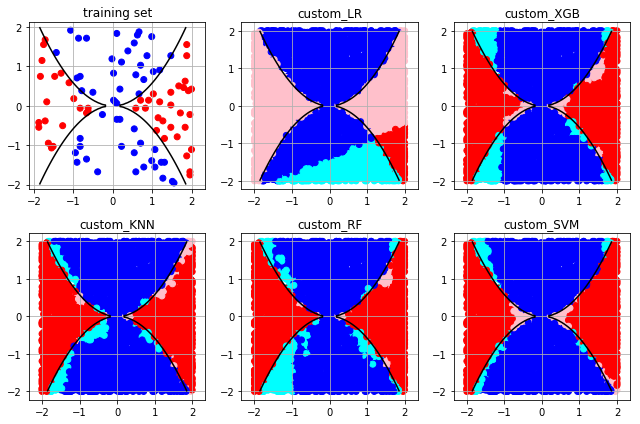

In [421]:
equ = custom #@param ["sine", "linear_equation", "custom", "polynom1", "circle_equation"] {type:"raw"}
train_size = 100 #@param {type:"integer"}
test_size = 5138 #@param {type:"integer"}
lower_window = -2 #@param {type:"number"}
higher_window = 2#@param {type:"number"}

window = (lower_window, higher_window)
daset_size = train_size + test_size
testp = test_size/daset_size
train(equ, daset_size=daset_size, test_size=testp, window=window)


Great, I think there are some observation we can make here. First, Logistic Regression algorithm really can't make a non-linearly separable classification. We can see this the clearest in the circle equation function, where LR cannot really distinguish. XGB's way ot classify is boxy, while KNNs and SVM can approximate the curve well albeit very reliant on the training data.

In [423]:
# !git init
! git config --global user.email "farhan.np9@gmail.com"
!  git config --global user.name "Farhan N Pakaya"
!git commit -m "first commit"
!git remote add origin https://github.com/farhannp9/Experimenting-with-Machine-Learning.git
!git push -u origin master

On branch master

Initial commit

Untracked files:
	.config/
	sample_data/

nothing added to commit but untracked files present
fatal: remote origin already exists.
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/farhannp9/Experimenting-with-Machine-Learning.git'


In [424]:
!ls

sample_data
